In [31]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [32]:
import psycopg2

conn = psycopg2.connect(host=get_secret('postgresql')['host'],
                      user=get_secret('postgresql')['username'],
                      password = get_secret('postgresql')['password'],
                      dbname=get_secret('postgresql')['engine'])

cur = conn.cursor()

# Q1 population growth

In [40]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.7 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install "jupyter-ai-magics[all]" -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
safety-schemas 0.0.14 requires pydantic<2.10.0,>=2.6.0, but you have pydantic 2.12.0 which is incompatible.
sparkmagic 0.21.0 requires pandas<2.0.0,>=0.17.1, but you have pandas 2.2.3 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [38]:
! pip install jupyter-ai-magics[all] -q

  error: subprocess-exited-with-error
  
  × Building wheel for tiktoken (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [50 lines of output]
      /tmp/pip-build-env-2odrykqj/overlay/lib/python3.10/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
              Please use a simple string containing a SPDX expression for `project.license`. You can also use `project.license-files`. (Both options available on setuptools>=77.0.0).
      
              By 2026-Feb-18, you need to update your project and remove deprecated calls
              or your builds will no longer be supported.
      
              See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
              ******************************************************************

In [43]:
import warnings
warnings.simplefilter('ignore')

In [44]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [45]:
%load_ext jupyter_ai_magics

In [69]:
sql = """
     select * from name_income
     where fips = '41'
     """

In [70]:
import pandas as pd

va_df = pd.read_sql(sql, con=conn)


In [15]:
%%ai gpt4
What is included in the {va_df}

The provided data includes the following:

- `fips`: This field appears to include a numerical identifier. In this case, '41' consistently refers to Oregon. In the U.S., FIPS codes are used to identify states and counties for statistical purposes. 
- `name`: The name of the state. In this case, all the rows are about Oregon. 
- `income`: This field shows the income for Oregon for each specific year, presumably the median or mean of some relevant measure of income.
- `year`: The year corresponding to the income data. The dataset in this case runs from 2005 through 2019. 

Here is the data translated into markdown:

| fips | name   | income | year |
|------|--------|--------|------|
| 41   | Oregon | 42944  | 2005 |
| 41   | Oregon | 46230  | 2006 |
| 41   | Oregon | 48730  | 2007 |
| 41   | Oregon | 50169  | 2008 |
| 41   | Oregon | 48457  | 2009 |
| 41   | Oregon | 46560  | 2010 |
| 41   | Oregon | 46816  | 2011 |
| 41   | Oregon | 49161  | 2012 |
| 41   | Oregon | 50251  | 2013 |
| 41   | Oregon | 51075  | 2014 |
| 41   | Oregon | 54148  | 2015 |
| 41   | Oregon | 57532  | 2016 |
| 41   | Oregon | 60212  | 2017 |
| 41   | Oregon | 63426  | 2018 |
| 41   | Oregon | 67058  | 2019 |

In [22]:
%%ai gpt4 -f code
Calculate the growth rate with the data provided in {va_df}, use the va_df directly, and visualize the result on a line chart

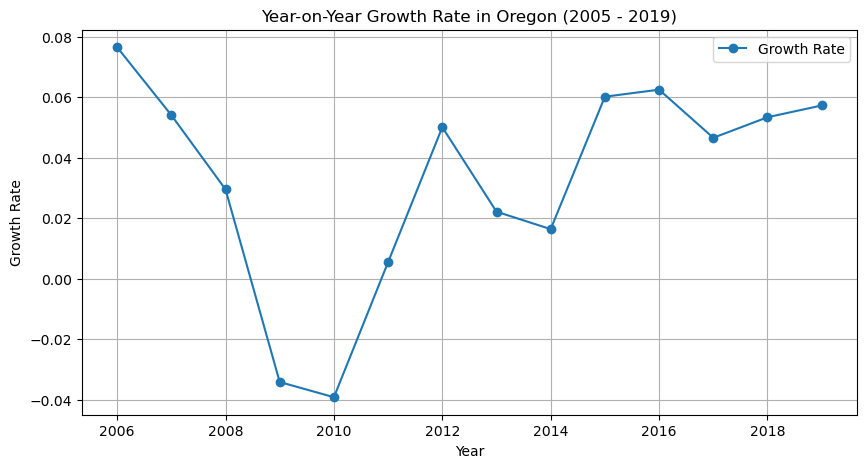

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the data is in 'va_df' dataframe

# Calculate the growth rate
va_df['growth_rate'] = va_df['income'].pct_change() 

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(va_df['year'], va_df['growth_rate'], label='Growth Rate', marker='o')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.title('Year-on-Year Growth Rate in Oregon (2005 - 2019)')
plt.legend()
plt.grid(True)
plt.show()

Population droped dramatically in 2010 yet spiked almost as dramatially up to 2012

# Question 2

In [72]:
sql_2 = """
     select * from oregon_income_population
     """

In [51]:
OR_df= pd.read_sql(sql_2, con=conn)
OR_df.head()

,name,year,income,pop
0,Oregon,2005,42944,3560109
1,Oregon,2006,46230,3700758
2,Oregon,2007,48730,3747455
3,Oregon,2008,50169,3790060
4,Oregon,2009,48457,3825657


In [53]:
%%ai gpt4 -f code
use the data in {OR_df}, create a dual axis chart where the x-axis=year, left y-axis= population(line), and the right Y-axis=median household income (bar or line, different color), and includes the state name in the title

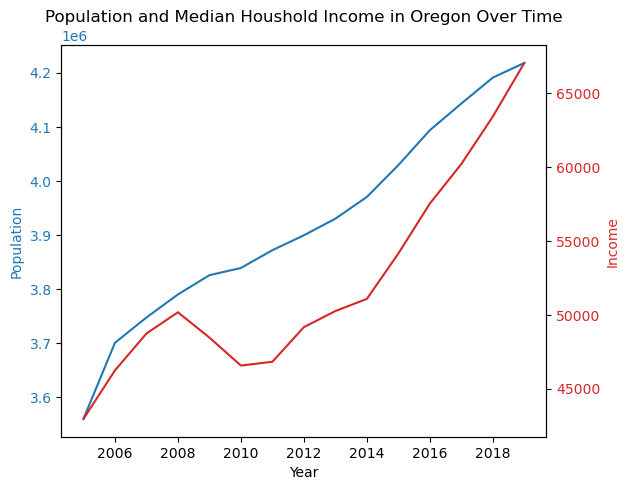

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# data
data = {'name': ['Oregon']*15, 'year': list(range(2005, 2020)), 
        'income': [42944, 46230, 48730, 50169, 48457, 46560, 46816, 49161, 50251, 51075, 54148, 57532, 60212, 63426, 67058], 
        'pop': [3560109, 3700758, 3747455, 3790060, 3825657, 3838957, 3871859, 3899353, 3930065, 3970239, 4028977, 4093465, 4142776, 4190713, 4217737]}

df = pd.DataFrame(data)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Population', color=color)
ax1.plot(df['year'], df['pop'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Income', color=color)  
ax2.plot(df['year'], df['income'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title("Population and Median Houshold Income in Oregon Over Time")
plt.show()

From the Charte above we can see thatin 2010 the income and population has a large disparity between the two

# Question 3

In [62]:
sql_3 = """
     select * from oregon_income_growth
     """

In [63]:
ORG_df= pd.read_sql(sql_3, con=conn)
ORG_df.head()

,year,income,annual_increase
0,2005,42944,NaN
1,2006,46230,3286.0
2,2007,48730,2500.0
3,2008,50169,1439.0
4,2009,48457,-1712.0


In [66]:
%%ai gpt4 -f code
Use the data in {ORG_df}, create a bar chart that shows the anual incrase of profit over time 

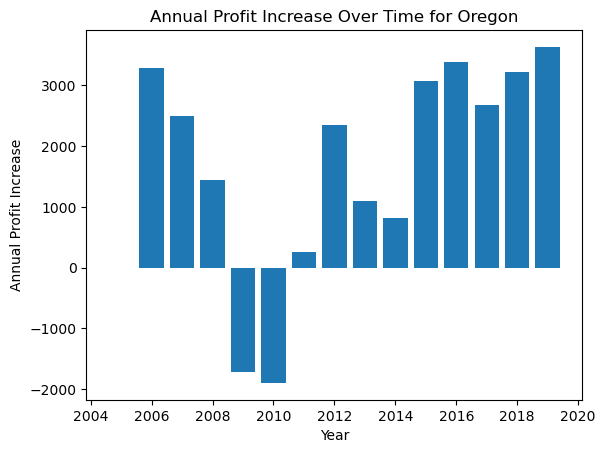

In [68]:
import matplotlib.pyplot as plt

# data
data = {
  'year': [2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],
  'annual_increase': [0,3286.0,2500.0,1439.0,-1712.0,-1897.0,256.0,2345.0,1090.0,824.0,3073.0,3384.0,2680.0,3214.0,3632.0]
}

plt.bar(data['year'], data['annual_increase'])
plt.xlabel('Year')
plt.ylabel('Annual Profit Increase')
plt.title('Annual Profit Increase Over Time for Oregon')
plt.show()

After the year 2014 the income of Oregon increases and tends to stay relativly high in comparison to previous years